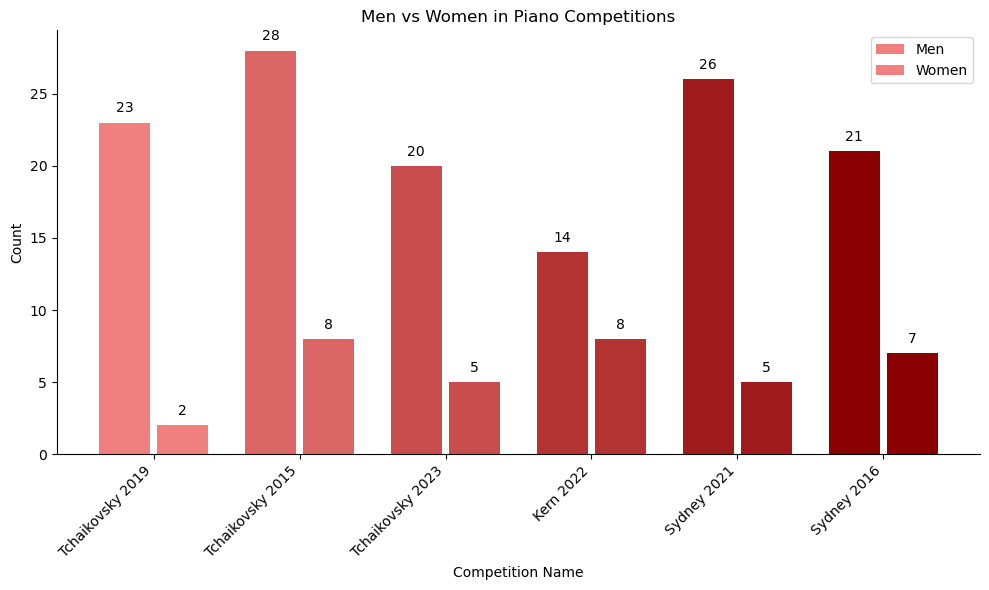

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

competitions = ['Tchaikovsky 2019', 'Tchaikovsky 2015', 'Tchaikovsky 2023', 'Kern 2022', 'Sydney 2021', 'Sydney 2016']
men_counts = [23, 28, 20, 14, 26, 21]
women_counts = [2, 8, 5, 8, 5, 7]

x = np.arange(len(competitions))

width = 0.35
gap = 0.05
fig, ax = plt.subplots(figsize=(10, 6))
cmap = LinearSegmentedColormap.from_list("red_gradient", ["lightcoral", "darkred"])

rects1 = ax.bar(x - width/2 - gap/2, men_counts, width, label='Men', color=cmap(np.linspace(0, 1, len(men_counts))))
rects2 = ax.bar(x + width/2 + gap/2, women_counts, width, label='Women', color=cmap(np.linspace(0, 1, len(women_counts))))

#make these numbers appear only when you hover over them
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, f'{height}', ha='center', va='bottom', fontsize=10)

#make these numbers appear only when you hover over them
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, f'{height}', ha='center', va='bottom', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Competition Name')
ax.set_ylabel('Count')
ax.set_title('Men vs. Women in Piano Competitions')
ax.set_xticks(x)
ax.set_xticklabels(competitions, rotation=45, ha="right")
ax.legend()


plt.tight_layout()
plt.show()
